## Problem 1 A. 
Data exploration
Explore the three datasets. Use your judgment as a human being to describe
what makes you able to tell spam apart from ham. Also explore the differences between the two classes of ham (easy and hard ham). What makes them different? Write approximately one paragraph.

1. ##### Difference between Ham and Spam
    Spam contains a lot of clickbaity titles with links that looks more than suspicious. Very sensational language and the senders adress looks very auto-generated for example: sabrina@mx3.1premio.com.
    Ham on the other hand is more legit and the emails looks like they are sent from either real people or real companies with a newsletter and you get the choice to unsubscribe or not.

2. ##### Difference between Hard and Easy Ham
    Easy ham seems to be mostly conversations between real life people, not alot of code, mostly natural speaking language
    Hard Ham contains more code, and contains mostly of commercials which makes it hard to judge if it's actually wanted by the reciever or not.

## Problem 1 B.
Perform an appropriate train-test split on the each of the datasets. We will use
the training sets to train a classifier, and evaluate its performance against the
test sets.

In [32]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Creating lists and dicts to parse the text files
easy_ham_texts: list[str] = []
hard_ham_texts: list[str] = []
spam_texts: list[str] = []
easy_ham_labels: list[str] = []
hard_ham_labels: list[str] = []
spam_labels: list[str] = []
easy_ham_dir_path = os.getcwd() + "/20021010_easy_ham/easy_ham/"
hard_ham_dir_path = os.getcwd() + "/20021010_hard_ham/hard_ham/"
spam_dir_path = os.getcwd() + "/20021010_spam/spam/"

# Parsing the text files into lists
for file_name in os.listdir(easy_ham_dir_path):
    f = open(easy_ham_dir_path+file_name, "r", encoding="latin-1")
    text = f.read()
    easy_ham_texts.append(text)
    easy_ham_labels.append("easy_ham")
    f.close()

for file_name in os.listdir(hard_ham_dir_path):
    f = open(hard_ham_dir_path+file_name, "r", encoding="latin-1")
    text = f.read()
    hard_ham_texts.append(text)
    hard_ham_labels.append("hard_ham")
    f.close()

for file_name in os.listdir(spam_dir_path):
    f = open(spam_dir_path+file_name, "r", encoding="latin-1")
    text = f.read()
    spam_texts.append(text)
    spam_labels.append("spam")
    f.close()

# type hinting for the lists
easy_ham_x_test: list[str]
easy_ham_y_test: list[str]
easy_ham_x_train: list[str]
easy_ham_y_train: list[str]
hard_ham_x_test: list[str]
hard_ham_y_test: list[str]
hard_ham_x_train: list[str]
hard_ham_y_train: list[str]
spam_x_test: list[str]
spam_y_test: list[str]
spam_x_train: list[str]
spam_y_train: list[str]

# Make a simple train-test split using 25% of the data for testing as this was recommended in last thursday's lecture,
# no shuffling is needed for naive bayes
easy_ham_x_train, easy_ham_x_test, easy_ham_y_train, easy_ham_y_test = train_test_split(easy_ham_texts, easy_ham_labels, test_size=0.25)

hard_ham_x_train, hard_ham_x_test, hard_ham_y_train, hard_ham_y_test = train_test_split(hard_ham_texts, hard_ham_labels, test_size=0.25)

spam_x_train, spam_x_test, spam_y_train, spam_y_test = train_test_split(spam_texts, spam_labels, test_size=0.25)

## Problem 2.
A bag of words maps text documents into vectors of word counts. That is, each
word is assigned a token number, and we count the number of occurrences of
each unique word in each document. The vector then consists of these counts.
Use the CountVectorizer class in Scikit-Learn to convert the emails to
vectors (or rather the set of emails into a matrix). Acquaint yourself with the
documentation of the class because it is nontrivial to use (specifically understand
what the methods fit, transform, and fit transform do and how to use them
in this setting). In your report, explain succinctly what you did. You don’t have
to separate the headers from the body of the email; processing the entire email
is ok.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

vectorizer = CountVectorizer(encoding='latin-1')

# Combine spam and ham into one list for fitting the vectorizer to produce matrixes
vectorizer_fitting_data = []
vectorizer_fitting_data.extend(easy_ham_x_train)
vectorizer_fitting_data.extend(spam_x_train)
vectorizer_fitting_data.extend(hard_ham_x_train)

# Fit the vectorizer with all the training data. We fit the vectorizer with all the data before we transform
# The data to ensure all the matrixes have the same amount of features
vectorizer = vectorizer.fit(vectorizer_fitting_data)

# Transform the training data into a matrix.
easy_ham_x_train_matrix: csr_matrix = vectorizer.transform(easy_ham_x_train)
spam_x_train_matrix: csr_matrix = vectorizer.transform(spam_x_train)
hard_ham_x_train_matrix: csr_matrix = vectorizer.transform(hard_ham_x_train)

# Transform the test data into a matrix.
easy_ham_x_test_matrix: csr_matrix = vectorizer.transform(easy_ham_x_test)
spam_x_test_matrix: csr_matrix = vectorizer.transform(spam_x_test)
hard_ham_x_test_matrix: csr_matrix = vectorizer.transform(hard_ham_x_test)

## Problem 3.
We are going to try out two different Na ̈ıve Bayesian Classifiers: <br>
<a>1https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.</a> <br>
text.CountVectorizer.html

* The Multinomial Naive Bayesian Classifier, and
* The Bernoulli Naive Bayesian Classifier.

For this problem, use the set easy ham as your ham. Use the training sets
of ham and spam to train an instance of both classifiers. Then, evaluate the
classifier against the test set.
In your report, report the accuracy, precision, and recall of your classifiers,
that is, six numbers. Also provide the confusion matrix for both classifiers (2×2
matrix where positive/negative predictions are the columns, and actual posi-
tive/negative values as rows). The count of true/false positives and true/false
negatives should be easily readable in the matrix, together with the marginal
sums.

MultinomialNB accuracy: 0.975130890052356
BernoulliNB accuracy: 0.9070680628272252
MultinomialNB precision: 1.0
BernoulliNB precision: 0.9365079365079365
MultinomialNB recall: 0.8492063492063492
BernoulliNB recall: 0.46825396825396826


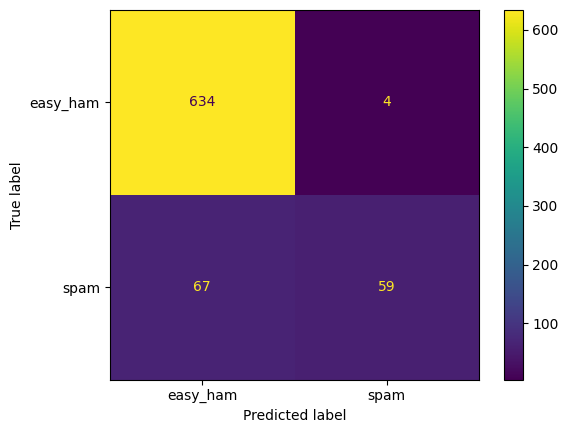

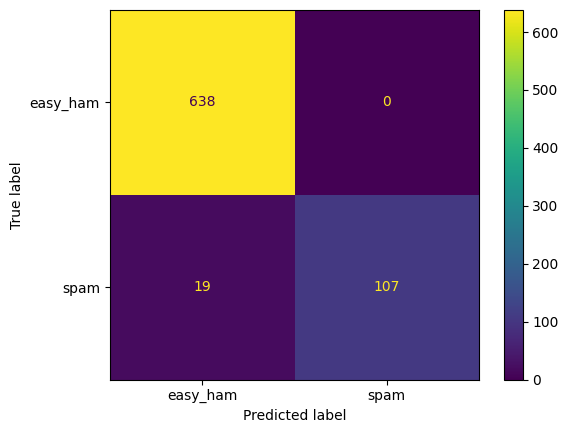

In [34]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Create the training data.
training_data = np.concatenate((easy_ham_x_train_matrix.toarray(), spam_x_train_matrix.toarray()))
training_labels = np.concatenate((easy_ham_y_train, spam_y_train))

# Create the test data.
test_data = np.concatenate((easy_ham_x_test_matrix.toarray(), spam_x_test_matrix.toarray()))
test_labels = np.concatenate((easy_ham_y_test, spam_y_test))

# Create the classifiers and fit it to the training data.
multinomial_nb_clf = MultinomialNB()
multinomial_nb_clf.fit(training_data, training_labels)

bernoulli_nb_clf = BernoulliNB()
bernoulli_nb_clf.fit(training_data, training_labels)

# Evaluate accuracy on the test data.
# accuracy answers the question: how often the model is right?
bernoulli_accuracy_score = bernoulli_nb_clf.score(test_data, test_labels)
multinomial_accuracy_score = multinomial_nb_clf.score(test_data, test_labels)
print(f"MultinomialNB accuracy: {multinomial_accuracy_score}")
print(f"BernoulliNB accuracy: {bernoulli_accuracy_score}")

# Evaluate the precision, figured average = "binary" is fine since this is a two class classification problem.
# pos_label="spam" is used to specify that spam is the positive class, which is the class we are interested in.
# precision answers the question: how often the positive predictions are correct?
bernoulli_precision_score = precision_score(test_labels, bernoulli_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
multinomial_precision_score = precision_score(test_labels, multinomial_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
print(f"MultinomialNB precision: {multinomial_precision_score}")
print(f"BernoulliNB precision: {bernoulli_precision_score}")

# Evaluate the recall .
# recall answers the question: can an ML model find all instances of the positive class?
bernoulli_recall_score = recall_score(test_labels, bernoulli_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
multinomial_recall_score = recall_score(test_labels, multinomial_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
print(f"MultinomialNB recall: {multinomial_recall_score}")
print(f"BernoulliNB recall: {bernoulli_recall_score}")

# Create the confusion matrix.
bernoulli_confusion_matrix = confusion_matrix(test_labels, bernoulli_nb_clf.predict(test_data))
multinomial_confusion_matrix = confusion_matrix(test_labels, multinomial_nb_clf.predict(test_data))
dis_bernoulli = ConfusionMatrixDisplay(bernoulli_confusion_matrix, display_labels=bernoulli_nb_clf.classes_)
disp_multinomial = ConfusionMatrixDisplay(multinomial_confusion_matrix, display_labels=multinomial_nb_clf.classes_)
dis_bernoulli.plot() 
disp_multinomial.plot()
plt.show()


## Problem 4.
Repeat the experiment of the previous problem, but use hard ham instead.
Report the same values. Discuss the differences in results.

MultinomialNB accuracy: 0.9206349206349206
BernoulliNB accuracy: 0.8518518518518519
MultinomialNB precision: 0.9051094890510949
BernoulliNB precision: 0.8181818181818182
MultinomialNB recall: 0.9841269841269841
BernoulliNB recall: 1.0


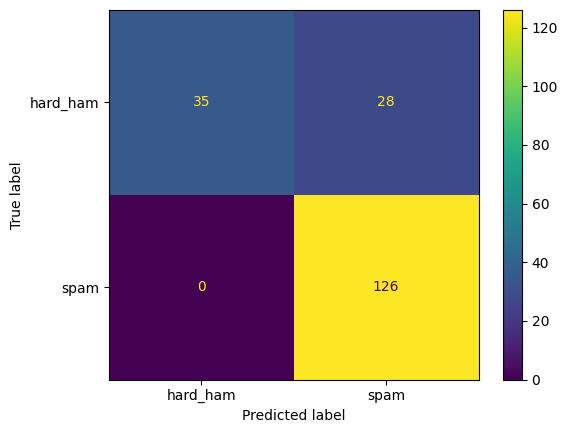

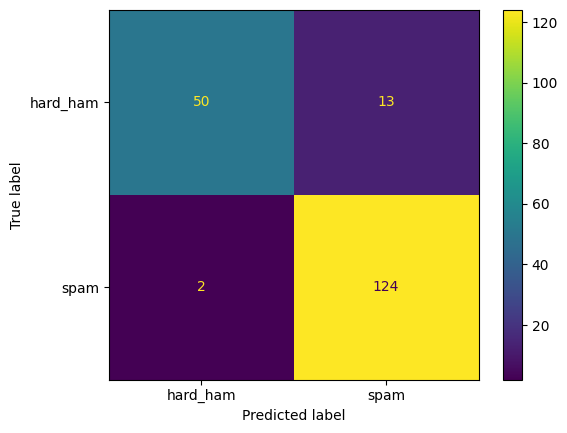

In [35]:
# Create the training data.
training_data = np.concatenate((hard_ham_x_train_matrix.toarray(), spam_x_train_matrix.toarray()))
training_labels = np.concatenate((hard_ham_y_train, spam_y_train))

# Create the test data.
test_data = np.concatenate((hard_ham_x_test_matrix.toarray(), spam_x_test_matrix.toarray()))
test_labels = np.concatenate((hard_ham_y_test, spam_y_test))

# Create the classifiers and fit it to the training data.
multinomial_nb_clf = MultinomialNB()
multinomial_nb_clf.fit(training_data, training_labels)

bernoulli_nb_clf = BernoulliNB()
bernoulli_nb_clf.fit(training_data, training_labels)

# Evaluate accuracy on the test data.
# accuracy answers the question: how often the model is right?
bernoulli_accuracy_score = bernoulli_nb_clf.score(test_data, test_labels)
multinomial_accuracy_score = multinomial_nb_clf.score(test_data, test_labels)
print(f"MultinomialNB accuracy: {multinomial_accuracy_score}")
print(f"BernoulliNB accuracy: {bernoulli_accuracy_score}")

# Evaluate the precision, figured average = "binary" is fine since this is a two class classification problem.
# pos_label="spam" is used to specify that spam is the positive class, which is the class we are interested in.
# precision answers the question: how often the positive predictions are correct?
bernoulli_precision_score = precision_score(test_labels, bernoulli_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
multinomial_precision_score = precision_score(test_labels, multinomial_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
print(f"MultinomialNB precision: {multinomial_precision_score}")
print(f"BernoulliNB precision: {bernoulli_precision_score}")

# Evaluate the recall .
# recall answers the question: can an ML model find all instances of the positive class?
bernoulli_recall_score = recall_score(test_labels, bernoulli_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
multinomial_recall_score = recall_score(test_labels, multinomial_nb_clf.predict(test_data), zero_division=0, pos_label="spam")
print(f"MultinomialNB recall: {multinomial_recall_score}")
print(f"BernoulliNB recall: {bernoulli_recall_score}")

# Create the confusion matrix.
bernoulli_confusion_matrix = confusion_matrix(test_labels, bernoulli_nb_clf.predict(test_data))
multinomial_confusion_matrix = confusion_matrix(test_labels, multinomial_nb_clf.predict(test_data))
dis_bernoulli = ConfusionMatrixDisplay(bernoulli_confusion_matrix, display_labels=bernoulli_nb_clf.classes_)
disp_multinomial = ConfusionMatrixDisplay(multinomial_confusion_matrix, display_labels=multinomial_nb_clf.classes_)
dis_bernoulli.plot() 
disp_multinomial.plot()
plt.show()